0-- informative . 1 -- non informative

Image

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications
import numpy as np
from keras.models import load_model
import pandas as pd
import re

In [2]:
test=pd.read_csv('../input/majortesttrainsplit/test.csv')

In [8]:
savemodel = tf.keras.models.load_model('../input/resnettask1/best_model_alt-valloss-resnet (1).h5')

In [9]:
predicted=[]
real=[]
for _,row in test.iterrows():
    if row['image_info']=='informative':
        r=0
    else:
        r=1
    path=f'../input/crisismmd/CrisisMMD_v2.0/{row["image_path"]}'
    img = tf.keras.utils.load_img(
    path, target_size=(224, 224)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array=preprocess_input(img_array)

    predictions = savemodel.predict(img_array)
    real.append(r)
    predicted.append(np.argmax(predictions))

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Text

In [3]:
def preprocess(text):
  
    text=text.lower()
    text=re.sub(r'rt\s*@[^:]*:\s', ' ', text)
    text=re.sub(r'[^A-Za-z0-9]+', ' ', text)
    text=re.sub(r' t .*$', '', text)
    text=re.sub(r'\b[a-zA-Z]\b', '', text)
    text=re.sub(r'/^\s+|\s+$|\s+(?=\s)/g', '', text);
    text = re.sub(r's+[a-zA-Z]s+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text=re.sub(r'https?','',text)
    text=re.sub(r'#[A-Za-z0-9_]+','',text)
    text=re.sub(r'\.\.\.',' ',text)
    text=text.replace('…',' ')
    text=text.replace('..',' ')
    text=re.sub(r'@\w*',r'',text)
    text=re.sub(r'\s{2,}',r' ',text)
    text=re.sub(r'$[\s]+','',text)
    text=text.replace('&amp','')
    text=text.replace('&gt','')
    text=text.replace('&lt','')
    text=re.sub(r'([\w\d]+)([^\w\d ]+)', r'\1 \2',text)
    text=re.sub(r'([^\w\d ]+)([\w\d]+)', r'\1 \2',text)

    return text

In [4]:

test["tweet_text"]=test["tweet_text"].apply(lambda x: preprocess(x))
test["type"] = test["text_info"].apply(lambda x: 1 if x == "informative"  else 0)

test

,Unnamed: 0,Unnamed: 0.1,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path,type
0,586,586,919645897054502912,919645897054502912_0,not_informative,1.0000,not_informative,0.6726,not_humanitarian,1.0000,not_humanitarian,0.6726,NaN,NaN,incredible moment family dog emerges unscathed...,http://pbs.twimg.com/media/DMM9EXKU8AAv6QU.jpg,data_image/california_wildfires/15_10_2017/919...,0
1,5116,5116,916351942212939776,916351942212939776_0,informative,0.3555,informative,0.6881,affected_individuals,0.3555,infrastructure_and_utility_damage,0.6881,severe_damage,0.3491,it may be dark in puerto rico but electric cus...,http://pbs.twimg.com/media/DLeJO-bXUAAFcAX.jpg,data_image/hurricane_maria/6_10_2017/916351942...,1
2,4549,4549,914682387249995776,914682387249995776_0,not_informative,1.0000,not_informative,0.6508,not_humanitarian,1.0000,not_humanitarian,0.6508,NaN,NaN,comic diary about what we re living in puertor...,http://pbs.twimg.com/media/DLGaoByVYAAWTPb.jpg,data_image/hurricane_maria/2_10_2017/914682387...,0
3,15254,15254,909925688983113728,909925688983113728_0,not_informative,0.6939,not_informative,1.0000,not_humanitarian,0.6939,not_humanitarian,1.0000,NaN,NaN,enjoy your first night after irma with no curfew,http://pbs.twimg.com/media/DKC0l2PXUAA7ehn.jpg,data_image/hurricane_irma/18_9_2017/9099256889...,0
4,1691,1691,870156017392287744,870156017392287744_0,informative,0.7683,informative,1.0000,rescue_volunteering_or_donation_effort,0.7683,affected_individuals,1.0000,NaN,NaN,bangladesh has evacuated at least 350 000 peo...,http://pbs.twimg.com/media/DBDksrWXkAUnGM2.jpg,data_image/srilanka_floods/1_6_2017/8701560173...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,17618,17618,911994432886591496,911994432886591496_0,informative,1.0000,not_informative,1.0000,other_relevant_information,1.0000,not_humanitarian,1.0000,NaN,NaN,4 00 magnitude earthquake has occurred near o...,http://pbs.twimg.com/media/DKgOGQrV4AA9FX_.jpg,data_image/mexico_earthquake/24_9_2017/9119944...,1
3613,8818,8818,904728262877765632,904728262877765632_0,informative,0.7396,informative,1.0000,rescue_volunteering_or_donation_effort,0.7396,affected_individuals,1.0000,NaN,NaN,some of texas most selfless hurricane harvey h...,http://pbs.twimg.com/media/DI3kP2zVwAAtZ4N.jpg,data_image/hurricane_harvey/4_9_2017/904728262...,1
3614,12462,12462,905686913876582401,905686913876582401_0,informative,0.3333,informative,1.0000,other_relevant_information,0.3333,infrastructure_and_utility_damage,1.0000,mild_damage,0.7222,irma destruction island by island,http://pbs.twimg.com/media/DJGlck_UMAEU7V0.jpg,data_image/hurricane_irma/7_9_2017/90568691387...,1
3615,11417,11417,908113530875994112,908113530875994112_3,not_informative,0.6774,informative,0.6370,not_humanitarian,0.6774,rescue_volunteering_or_donation_effort,0.6370,NaN,NaN,making difference back in my hometown hurrican...,http://pbs.twimg.com/media/DJpEbynXgAI1Flk.jpg,data_image/hurricane_harvey/13_9_2017/90811353...,0


Text 2

In [5]:
from transformers import TFBertModel, BertTokenizer
bert=model = load_model('../input/berttask1/BERT_best_model.h5',custom_objects={'TFBertMainLayer':TFBertModel.from_pretrained("bert-base-uncased", output_hidden_states = True)})

2022-06-17 15:11:41.908339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 15:11:41.909570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 15:11:41.910545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 15:11:41.911767: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [7]:
max_len=42
tokenized_test = test["tweet_text"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
labels_test = test["type"].values
input_ids_test= np.array([i + [0]*(max_len-len(i)) for i in tokenized_test.values])
attention_mask_test= np.where(input_ids_test!= 0, 1, 0)
dataset_test = tf.data.Dataset.from_tensor_slices((input_ids_test,attention_mask_test,labels_test))

def map_func(input_ids, masks, labels):
    return {'input_ids' : input_ids, 'attention_mask' : masks}, labels
dataset_test = dataset_test.map(map_func)
dataset_test = dataset_test.batch(32)
y_pred = model.predict(dataset_test)

y_pred_hot = []
for i in range(len(y_pred)):
    if (y_pred[i] < 0.5):
        y_pred_hot.append(0)
    else:
        y_pred_hot.append(1)

2022-06-17 15:12:10.916046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-17 15:12:15.778684: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Reversing the polarity

In [10]:
text_labels=[]
for i in labels_test:
    text_labels.append(i^1)
print(text_labels)
text_predicted=[]
for i in range(len(y_pred_hot)):
    text_predicted.append(y_pred_hot[i]^1)
print(text_predicted)

[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 

In [11]:
multimodal_actual=[]
for i in range(len(text_labels)):
    multimodal_actual.append(text_labels[i]&real[i])
print(multimodal_actual)

[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 

In [12]:
multimodal_predicted=[]
for i in range(len(text_predicted)):
    multimodal_predicted.append(text_predicted[i]&predicted[i])
print(multimodal_predicted)

[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
from sklearn import metrics
print(metrics.classification_report(multimodal_actual,multimodal_predicted))
#print(metrics.confusion_matrix(real,predicted))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2746
           1       0.77      0.60      0.68       871

    accuracy                           0.86      3617
   macro avg       0.83      0.77      0.79      3617
weighted avg       0.85      0.86      0.85      3617



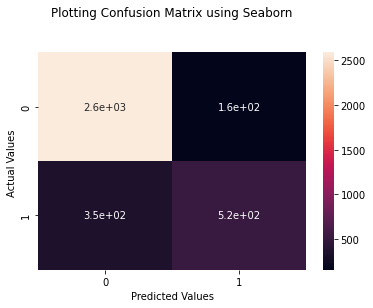

In [14]:
import seaborn as sebrn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as atlas
conf_matrix = (confusion_matrix(multimodal_actual,multimodal_predicted))

# Using Seaborn heatmap to create the plot
fx = sebrn.heatmap(conf_matrix, annot=True)

# labels the title and x, y axis of plot
fx.set_title('Plotting Confusion Matrix using Seaborn\n\n');
fx.set_xlabel('Predicted Values')
fx.set_ylabel('Actual Values ');
